In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from useful_functions import remove_zeros, remove_before, import_file, make_bins, make_equal_bins

In [2]:
loc_b53 = import_file('Locus', '2.B53')

In [3]:
loc_b53 = remove_zeros(loc_b53)
# loc_b53 = remove_before(loc_b53, 10)
print(loc_b53.max())

Date     2024-05-31 21:18:12
Count                   54.0
dtype: object


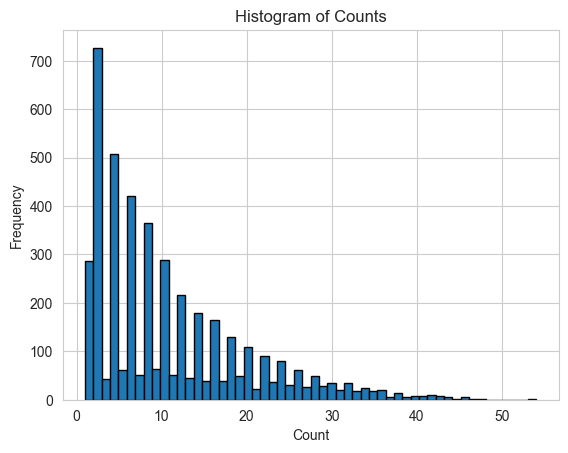

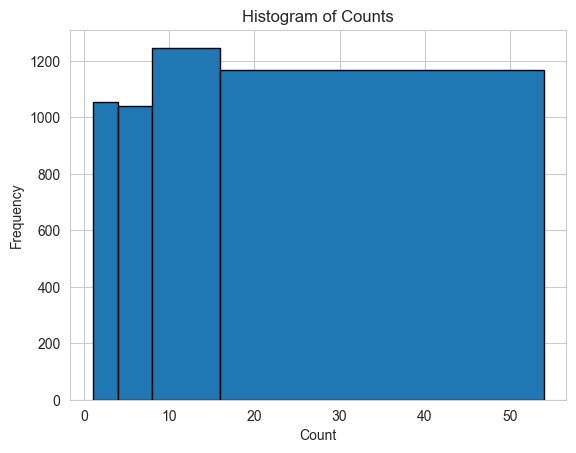

In [4]:
make_bins(loc_b53, 4, all_bins=True)
make_equal_bins(loc_b53)

In [5]:
loc_b55 = import_file('Locus', '2.B55')
loc_b56 = import_file('Locus', '2.B56')


In [6]:
print(loc_b55.info())
print(loc_b56)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5995 entries, 0 to 5994
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5995 non-null   datetime64[ns]
 1   Count   5871 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 93.8 KB
None
                    Date  Count
0    2024-04-01 11:35:08    NaN
1    2024-04-01 14:12:50    1.0
2    2024-04-01 14:17:49    4.0
3    2024-04-01 14:22:49    0.0
4    2024-04-01 14:27:49    0.0
...                  ...    ...
6449 2024-05-31 21:36:08    1.0
6450 2024-05-31 21:41:08    0.0
6451 2024-05-31 21:46:08    0.0
6452 2024-05-31 21:51:08    0.0
6453 2024-05-31 21:56:08    0.0

[6454 rows x 2 columns]


In [7]:
# loc_b55.set_index('Date', inplace=True)
# loc_b56.set_index('Date', inplace=True)

# Resample the data into ten-minute intervals
resampled_b55 = loc_b55.resample('10min').sum()  # You can use other aggregation functions like mean, max, etc.
resampled_b56 = loc_b56.resample('10min').sum()  # You can use other aggregation functions like mean, max, etc.

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
resampled_b55 = remove_zeros(resampled_b55)
resampled_b56 = remove_zeros(resampled_b56)

In [ ]:
print(resampled_b55)
print(resampled_b56)

In [ ]:
# Merge the DataFrames on the date column, using a full outer join
merged_df = pd.merge(resampled_b55, resampled_b56, on='Date', how='outer', suffixes=('_b55', '_b56'))


# Drop rows where either of the merged columns has NaN values
filtered_df = merged_df.dropna(subset=['Count_b55', 'Count_b56'])

# Add a new column with the differences between the two columns
filtered_df['Count'] = abs(filtered_df['Count_b55'] - filtered_df['Count_b56'])

# # Create a new DataFrame with only the Date and Difference columns
difference_df = filtered_df[['Count']]
print(difference_df)

In [ ]:
make_bins(difference_df,_,True)